# Retranscription d'entretiens avec Whisper


Ce notebook a pour objet la retranscription d'entretiens audios au format mp3 (d'autres formats peuvent être testés, on ne sait jamais) en fichier texte. L'outil utilisé est Whisper disponible sur [Github](https://github.com/openai/whisper). Le notebook présent est inspiré d'un [travail](https://www.css.cnrs.fr/whisper-pour-retranscrire-des-entretiens/) du CNRS.

Pour toute question ou remarque, n'hésitez pas à contacter [Victor Dryander](mailto:victor.dryander@cerema.fr) ou [Thomas Escrihuela](mailto:thomas.escrihuela@cerema.fr).

Le code source de ce notebook est stocké sur le Gitlab du Cerema.

⚠️ La transcription de l'audio peut être long ! 

### Sélection du fichier audio

Vous devez exécuter la cellule ci-desous pour créer un bouton de téléversement de votre fichier mp3.

In [39]:
print()
import ipywidgets as widgets
import whisper

widgets.IntSlider()
from IPython.display import display
w = widgets.IntSlider()
uploader = widgets.FileUpload(
    accept='*.mp3',  # Accepted file extension e.g. '.txt', '.pdf', 'image/*', 'image/*,.pdf'
    multiple=False  # True to accept multiple files upload else False
)
display(uploader)

print()

FileUpload(value=(), accept='*.mp3', description='Upload')

### Enregistrement du fichier audio sur le serveur

In [40]:
audio_file = uploader.value[0]["name"]

with open(f'./{audio_file}', "wb") as fp:
    fp.write(uploader.value[0]["content"])

print()
print(f'Fichier [{audio_file}] copié sur le serveur !')
print()


Fichier [2023-07-10_Entretien_RNNES_Changement_climatique_FDC76_JDaniel.m4a] copié sur le serveur !



### Choix du modèle utilisé

Ici vous choisissez le modèle de transcription qui sera utilisé : 
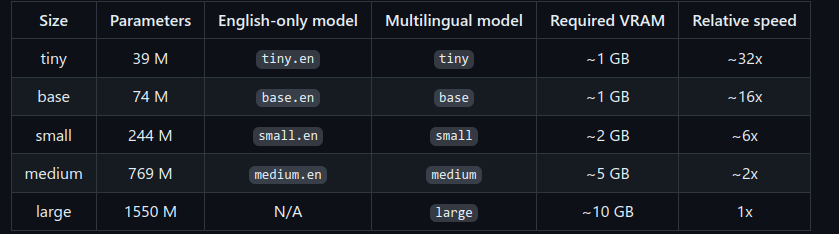



In [41]:
print()
modele = widgets.Dropdown(
    options=whisper.available_models(),
    value='large',
    description='Modèle :',
    disabled=False,
)
display(modele)

horodatage = widgets.Dropdown(
    options=['oui', 'non'],
    value='non',
    description='Horodatage ?',
    disabled=False,
)
display(horodatage)

print()

Dropdown(description='Modèle :', index=10, options=('tiny.en', 'tiny', 'base.en', 'base', 'small.en', 'small',…

Dropdown(description='Horodatage ?', index=1, options=('oui', 'non'), value='non')

### Retranscription par Whisper

La cellule ci-dessous vous permet de lancer la transcription.

⚠️ La transcription de l'audio peut être long suivant le modèle utilisé ! 


In [42]:
%%time
print()

import whisper
from os.path import basename
import time

modele_whisper = modele.value # Taille du modèle de transcription

print("Chargement du modèle...")
model = whisper.load_model(modele_whisper)
 
# Transcription
print("Transcription commencée...")
transcription = model.transcribe(audio_file, verbose = False)
 
print("Transcription terminée...")

# Une fonction pour faciliter l'horodatage des segments de parole en heures, minutes et secondes
def convertir(seconds):
    h = int(seconds // 3600)
    m = int((seconds % 3600) // 60)
    s = int(seconds % 60)
    return f"{h:02d}:{m:02d}:{s:02d}"
 
entretien_transcrit = f"{basename(audio_file).split('.')[0]}_modele_{modele_whisper}.txt"
 
# Enregistrement de la transcription
with open(entretien_transcrit , 'w', encoding='utf-8') as f:
    for segment in transcription["segments"]:
        start_time = convertir(segment['start'])
        end_time = convertir(segment['end'])
        f.write(f"{start_time} - {end_time}: {segment['text']}\n") if horodatage.value == 'oui' else f.write(f"{segment['text']}\n")

print(f"Écriture du fichier [{entretien_transcrit}] terminée !")

print()


Chargement du modèle...
Transcription commencée...


/home/thomas/.local/lib/python3.11/site-packages/whisper/transcribe.py:114: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Detected language: French


100%|██████████| 433585/433585 [1:26:28<00:00, 83.56frames/s] 

Transcription terminée...
Écriture du fichier [2023-07-10_Entretien_RNNES_Changement_climatique_FDC76_JDaniel_modele_large.txt] terminée !

CPU times: user 8h 32min 44s, sys: 4min 25s, total: 8h 37min 9s
Wall time: 1h 27min 38s


### Téléchargement de la retranscription

La cellule suivante vous permet de télécharger le fichier retranscrit !

In [43]:
print()
from IPython.display import display, FileLink

local_file = FileLink(entretien_transcrit, result_html_prefix="Télécharger le fichier retranscrit : ")
display(local_file)

/home/thomas/depots/sig-toolbox/Python/whisper/2023-07-10_Entretien_RNNES_Changement_climatique_FDC76_JDaniel_modele_large.txt